In [1]:
# Imports

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define path to data directories

# Note: Saved 'images to predict', 'test', 'train' and 'valid' folders in a new folder called 'Bird_Data'.

train_dir = '/content/drive/MyDrive/Bird_Data/train/'
valid_dir = '/content/drive/MyDrive/Bird_Data/valid/'
test_dir = '/content/drive/MyDrive/Bird_Data/test/'
images_to_predict_dir = '/content/drive/MyDrive/Bird_Data/images to predict/'


# Want to see each folder and one of their contents (ex: ABBOTTS BABBLER)

print("For train_dir")
print(os.listdir(train_dir))
train_abbots_babbler_dir = os.path.join(train_dir, 'ABBOTTS BABBLER')
print(os.listdir(train_abbots_babbler_dir))

#Note: "dashed_line()" function is being used to seperate the outputs.
def dashed_line(length):
    print('-' * length)
dashed_line(150)

print("For valid_dir")
print(os.listdir(valid_dir))
valid_abbots_babbler_dir = os.path.join(valid_dir, 'ABBOTTS BABBLER')
print(os.listdir(valid_abbots_babbler_dir))

dashed_line(150)

print("For test_dir")
print(os.listdir(test_dir))
test_abbots_babbler_dir = os.path.join(test_dir, 'ABBOTTS BABBLER')
print(os.listdir(test_abbots_babbler_dir))

dashed_line(150)

print("For images_to_predict_dir")
print(os.listdir(images_to_predict_dir))

For train_dir
['AFRICAN FIREFINCH', 'ALBATROSS', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN PIED HORNBILL', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN PYGMY GOOSE', 'ABBOTTS BABBLER', 'AFRICAN OYSTER CATCHER', 'ABBOTTS BOOBY', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN GOLDFINCH', 'AMERICAN COOT', 'AMERICAN BITTERN', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALBERTS TOWHEE', 'AMERICAN KESTREL', 'AMERICAN FLAMINGO', 'AMERICAN AVOCET']
['117.jpg', '007.jpg', '058.jpg', '106.jpg', '040.jpg', '113.jpg', '073.jpg', '139.jpg', '138.jpg', '102.jpg', '044.jpg', '154.jpg', '051.jpg', '146.jpg', '003.jpg', '012.jpg', '155.jpg', '042.jpg', '080.jpg', '017.jpg', '043.jpg', '048.jpg', '104.jpg', '099.jpg', '038.jpg', '116.jpg', '023.jpg', '156.jpg', '126.jpg', '098.jpg', '147.jpg', '109.jpg', '039.jpg', '142.jpg', '091.jpg', '144.jpg', '145.jpg', '062.jpg', '066.jpg', '125.jpg', '072.jpg', '157.jpg', '162.jpg', '074.jpg', '065.jpg', '076.jpg', '016.jpg', '140.jpg', '021.jpg', '001.jpg', '163.j

154.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------


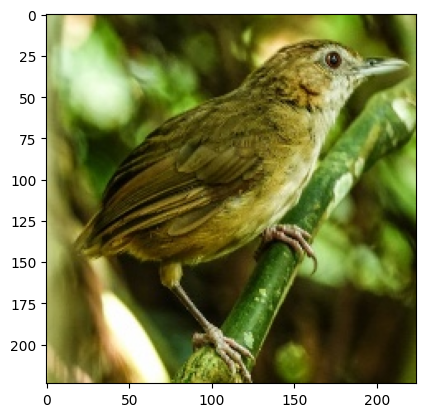

In [4]:
# Image view: train, 'ABBOTTS BABBLER', '012.jpg'

import matplotlib.pyplot as plt
from skimage.io import imread
import os


print(os.listdir(train_dir+ 'ABBOTTS BABBLER')[11])
# Output is '012.jpg'

dashed_line(150)

# Define the file path
train_ABBOTTS_BABBLER_12 = os.path.join(train_dir, 'ABBOTTS BABBLER', '012.jpg')

# Read the image
train_ABBOTTS_BABBLER_12_img = imread(train_ABBOTTS_BABBLER_12)

# Display the image
plt.imshow(train_ABBOTTS_BABBLER_12_img)
plt.show()

# Note: Image from train/'ABBOTTS BABBLER' is correct.

In [5]:
# Train ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Create the training data generator

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3).

Found 3208 images belonging to 20 classes.


In [6]:
# Valid ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

# NOTE: READ BELOW!!!
# For the validation generator, usually:
# DO NOT apply any augmentation (i.e., no random transformations like rotation, zoom, shift, etc.).
# Only apply rescaling to normalize the pixel values (if necessary).

valid_gen = ImageDataGenerator(
    rescale=1/255,
    )

# Create the validation data generator

valid_data = valid_gen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3).

Found 100 images belonging to 20 classes.


In [7]:
# Test ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

test_gen = ImageDataGenerator(
    rescale=1/255,
    )

# Create the test data generator

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3).

Found 100 images belonging to 20 classes.


In [8]:
# Import VGG16

# Import libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


base_model.trainable = False

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(train_data.class_indices), activation='softmax')  # Output layer with 'softmax' for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),   # A (smaller) learning rate for fine-tuning
    loss='categorical_crossentropy',      # For multi-class classification
    metrics=['accuracy']                  # Track accuracy during training
)

# Summary of the model
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,113,812 (57.65 MB)

 Trainable params: 399,124 (1.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# Training the model

from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)


# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=valid_data,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1126s 11s/step - accuracy: 0.1060 - loss: 2.9561 - val_accuracy: 0.4000 - val_loss: 2.2272
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 518ms/step - accuracy: 0.3428 - loss: 2.1984 - val_accuracy: 0.5600 - val_loss: 1.4322
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 516ms/step - accuracy: 0.4635 - loss: 1.7025 - val_accuracy: 0.6300 - val_loss: 1.0960
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 513ms/step - accuracy: 0.5414 - loss: 1.4515 - val_accuracy: 0.7600 - val_loss: 0.8674
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 51s 506ms/step - accuracy: 0.5943 - loss: 1.2587 - val_accuracy: 0.7800 - val_loss: 0.7604
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 83s 512ms/step - accuracy: 0.6484 - loss: 1.1300 - val_accuracy: 0.8200 - val_loss: 0.6422
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 511ms/step - accuracy: 0.6589 - loss: 1.0693 - val_accuracy: 0.8200 - val_loss: 0.6308
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 51s 508ms/step - accuracy: 0.6463 - loss: 1

In [10]:
from joblib import dump, load

# Define a path in your Google Drive
save_path = '/content/drive/MyDrive/M3P04_cnn_model.joblib'

# Save the model to Google Drive
dump(model, save_path)

['/content/drive/MyDrive/M3P04_cnn_model.joblib']

In [11]:
# Load model

from joblib import load

# Define the path where the model is saved
#load_path = '/content/drive/MyDrive/M3P04_cnn_model.joblib'

# Load the model
#model = load(load_path)

In [18]:
# Print metrics

# import pandas as pd

# metrics = pd.DataFrame(model.history.history)

# print(metrics)

Empty DataFrame
Columns: []
Index: []


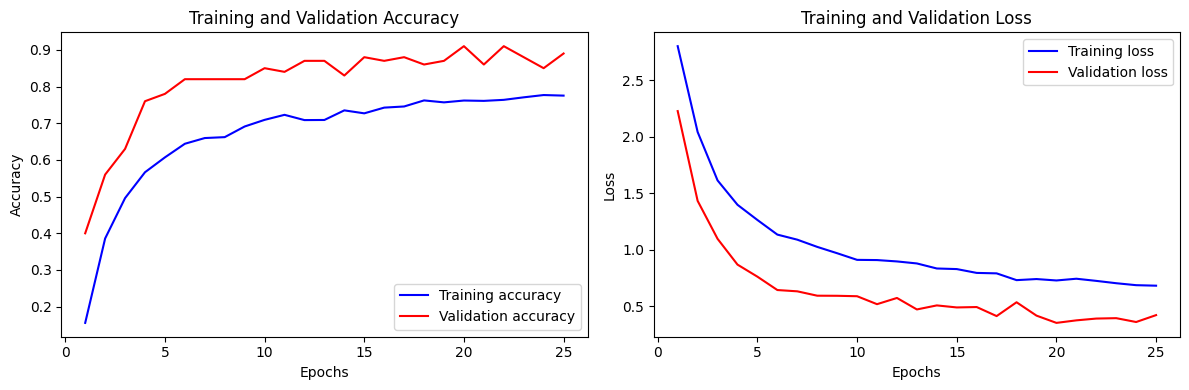

In [13]:
# Plot metrics

# Extracting training and validation metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine the number of epochs
epochs = range(1, len(train_acc) + 1)

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [14]:
# Evaluate the model on the test data

test_loss, test_accuracy = model.evaluate(
    test_data,
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.8892 - loss: 0.3333
Test Loss: 0.3028549253940582
Test Accuracy: 0.8999999761581421


In [16]:
# Evaluation with Classification Report

from sklearn.metrics import classification_report

# Get the true labels from the test data
true_labels = test_data.classes

# Use the model to predict the classes
predicted_labels = np.argmax(model.predict(test_data), axis=1)

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=test_data.class_indices.keys()))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
Classification Report:
                             precision    recall  f1-score   support

           ABBOTTS BABBLER       0.57      0.80      0.67         5
             ABBOTTS BOOBY       1.00      0.40      0.57         5
ABYSSINIAN GROUND HORNBILL       0.83      1.00      0.91         5
     AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
    AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
         AFRICAN FIREFINCH       0.83      1.00      0.91         5
    AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
     AFRICAN PIED HORNBILL       1.00      0.80      0.89         5
       AFRICAN PYGMY GOOSE       1.00      0.80      0.89         5
                 ALBATROSS       0.71      1.00      0.83         5
            ALBERTS TOWHEE       1.00      0.80      0.89         5
      ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
             ALPINE CHOUGH       1.00      0.80     

In [17]:
# Make a Prediction

from tensorflow.keras.preprocessing import image
import numpy as np
import os
from tensorflow.keras.applications.vgg16 import preprocess_input

# Using '2.jpg' from images_to_predict folder to make prediction

image_path = os.path.join(images_to_predict_dir, '2.jpg')

# Load image with target size (224, 224)
img = image.load_img(image_path, target_size=(224, 224))

# Convert the image to a numpy array and expand its dimensions to match the batch shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image to be in the format expected by VGG16
img_array = preprocess_input(img_array)

# Use model to make prediction
predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions, axis=1)

# Map the predicted index to the actual class name
class_names = list(train_data.class_indices.keys())
predicted_class = class_names[predicted_class_index[0]]

# Display the prediction
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: AFRICAN CROWNED CRANE


End